## Basic Tutorial on Simple Linear Regression Using TensorFlow

In this section, we look into the basic machanism of TensorFlow based on the simple example of Simple Linear Regression. In one demensional point case, the loss function of Simple LR is defined as follows:

$$loss(W, b) = \frac{1}{m}\sum_{i=1}^{m}(H(x_i) - y_i)^{2}$$

where $H(x_i) = Wx + b$ is a linear hypothesis. The following codes represents the procedure for training LR.

### Build graph using TF operations

In [1]:
import tensorflow as tf

# X and Y data
#x_train = [1, 2, 3]
#y_train = [1, 2, 3]

# the below enables users to change data (modulize)
X = tf.placeholder(tf.float32, shape=[None]) 
Y = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random_normal([1]), name="weight") #trainable variable
b = tf.Variable(tf.random_normal([1]), name="bias")

# Our hypothesis
H = X*W + b

# cost/loss function
loss = tf.reduce_mean(tf.square(H - Y))

# minimize the loss function
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

# the above builds the following graph
#                       |-- (W)
# (train)--(loss)--(H)---
#                       |-- (b)

### Run/update graph and get results

In [2]:
# Launch the graph in a session
sess = tf.Session()

# Initializes global variables in the graph
sess.run(tf.global_variables_initializer()) # before using W, B, must do it

# Fit the line
for step in range(2001):
    # trigger - train->minimize(loss)->compute(loss)->compute(H)->(W,b)
    # sess.run(train) 
    cost_val, W_val, b_val, _ = sess.run([loss, W, b, train],
                                     feed_dict={X:[1,2,3], Y:[1,2,3]})
    if step % 200 == 0:
        print(step, cost_val, W_val, b_val)
        # print(step, sess.run(loss), sess.run(W), sess.run(b))

0 14.7652 [-0.59200692] [ 0.02296198]
200 0.0202148 [ 0.8352651] [ 0.37448117]
400 0.00771901 [ 0.89820373] [ 0.23140673]
600 0.0029475 [ 0.93709612] [ 0.14299533]
800 0.0011255 [ 0.96112919] [ 0.08836239]
1000 0.000429774 [ 0.97598016] [ 0.05460268]
1200 0.000164107 [ 0.98515725] [ 0.03374112]
1400 6.26651e-05 [ 0.9908281] [ 0.02085003]
1600 2.39283e-05 [ 0.99433231] [ 0.01288398]
1800 9.13708e-06 [ 0.99649769] [ 0.00796155]
2000 3.48881e-06 [ 0.99783581] [ 0.00491973]


### Explore the loss function of Simple Linear Regression

In [3]:
import matplotlib.pyplot as plt

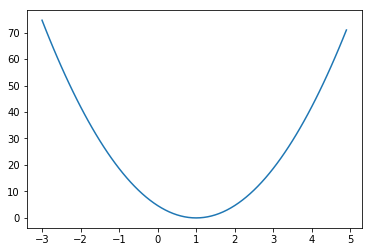

In [4]:
X = [1,2,3]
Y = [1,2,3]

W = tf.placeholder(tf.float32)

H = X*W # simplified

cost = tf.reduce_mean(tf.square(H - Y))

sess = tf.Session()

sess.run(tf.global_variables_initializer())

W_val = []
cost_val = []
for i in range(-30, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)
    
plt.plot(W_val, cost_val)
plt.show()

### Gradient descent for Simple Linear Regression using TensorFlow
In this section, we implement gradient descent for Simple Linear Regression based on TensorFlow. Suppose that the loss function of Simple Linear Regression without a bias term is defined as follows:

$$ loss(W) = \frac{1}{m}\sum_{i=1}^{m}(Wx_{i} - y_{i})^{2}$$ 

The gradient of the loss function of Simple LR is represented as follows:

$$ \frac{\partial}{\partial W} loss(W) = \frac{2}{m}\sum_{i=1}^{m}(Wx_{i} - y_{i})x_{i}$$

Then, the gradient descent on $W$ for Simple Linear Regression is:

$$ W \leftarrow W - \alpha \frac{\partial}{\partial W} loss(W)$$

where $\alpha$ is a learning rate of the gradient descent.
The following codes are for the gradient descent using TensorFlow.

In [5]:
x_data = [1,2,3]
y_data = [1,2,3]

W = tf.Variable(tf.random_normal([1]), name='weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

H = X*W # simplified

cost = tf.reduce_mean(tf.square(H - Y))

# define the gradient node for gradient descent
learning_rate = 0.1
gradient = tf.reduce_mean((W*X - Y)*X) * 2
descent = W - learning_rate * gradient
update = W.assign(descent)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(21):
    sess.run(update, feed_dict={X: x_data, Y: y_data})
    print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), 
          sess.run(W))

0 0.0177252 [ 0.93837005]
1 7.87787e-05 [ 0.99589133]
2 3.50024e-07 [ 0.99972612]
3 1.56041e-09 [ 0.9999817]
4 7.46188e-12 [ 0.99999875]
5 2.4869e-14 [ 0.99999994]
6 0.0 [ 1.]
7 0.0 [ 1.]
8 0.0 [ 1.]
9 0.0 [ 1.]
10 0.0 [ 1.]
11 0.0 [ 1.]
12 0.0 [ 1.]
13 0.0 [ 1.]
14 0.0 [ 1.]
15 0.0 [ 1.]
16 0.0 [ 1.]
17 0.0 [ 1.]
18 0.0 [ 1.]
19 0.0 [ 1.]
20 0.0 [ 1.]


### How to modify capture the gradient of TF's optimizer 
- gvs = optimizer.compute_gradient(cost)
- apply_gradients = optimizer.apply_gradients(gvs)
- sess.run(apply_gradients)

## Tutorial on Multi-variable Linear Regression
In this section, we study on Multi-variable Linear Regression using TensorFlow. In this case, a data point consists of multiple number of variables. Suppose a data point (or instance) $\mathbf{x}_{i}=[x_{i1}, \cdots, x_{id}]$, then, a set of data points is denoted by $\mathbf{X}=[\mathbf{x}_{i}; \cdots; \mathbf{x}_{m}]$. The weight vector has the same dimension of that of $\mathbf{x}_{i}$, i.e., $\mathbf{w}\in\mathbb{R}^{d}$. Then, the hypothesis of Linear Regression is represented with bais terms as follows:

$$H(\mathbf{X}) = \mathbf{Xw} + \mathbf{b}$$

Then, the loss function is represented as follows:

$$loss(W, b) = \frac{1}{m}||H(\mathbf{X}) - \mathbf{Y}||_{2}^{2}$$

In [6]:
# load data
import numpy as np

xy = np.loadtxt('datasets/data-01-test-score.csv', delimiter=',', 
                dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

#print(x_data.shape, x_data, len(x_data))
#print(y_data.shape, y_data)

d = x_data.shape[1]

# build a graph
X = tf.placeholder(tf.float32, shape=[None, d]) # None: flexible # of data points
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([d, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bais')

H = tf.matmul(X, W) + b

loss = tf.reduce_mean(tf.square(H - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(loss)

# run the graph
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(5000):
    loss_val, W_val, b_val, _ = sess.run([loss, W, b, train], 
                                         feed_dict={X: x_data, Y:y_data})
    if i%500 == 0:
        print(i, loss_val)
        
print("Your score will be ", sess.run(H, feed_dict={X: [[100, 70, 101]]}))

0 11992.5
500 9.0197
1000 8.22688
1500 7.64881
2000 7.22387
2500 6.90911
3000 6.67433
3500 6.49813
4000 6.36513
4500 6.26428
Your score will be  [[ 189.16983032]]


In [ ]:
# Next step: Queue Runner (6:50)
# http://sdr1982.tistory.com/181
# http://www.datascienceassn.org/content/installation-quickstart-tensorflow-anaconda-jupyter


## Queue Runner 
The follow codes show how to use Queue Runner for the case when your data file is not fit into memory.

In [13]:
filename_queue = tf.train.string_input_producer(['data-01-test-score.csv'], 
                                                shuffle=False, name='filename_queue')

reader = tf.TextLineReader()
key, value = reader.read(filename_queue)

#Default values
record_defaults = [[0.], [0.], [0.], [0.]]
xy = tf.decode_csv(value, record_defaults=record_defaults)

# collect batches of csv
train_x_batch, train_y_batch = tf.train.batch([xy[0:-1], xy[-1:]], batch_size=10)

# placeholder for a tensor that will be always fed
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')


H = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(H - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

for step in range(2001):
    x_batch, y_batch = sess.run([train_x_batch, train_y_batch])
    cost_val, h_val, _ = sess.run([cost, H, train], 
                                 feed_dict={X: x_batch, Y: y_batch})
    if step % 100 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction\n", h_val)

0 Cost:  82850.6 
Prediction
 [[-112.65097046]
 [-153.31192017]
 [-141.67698669]
 [-156.48040771]
 [-119.51522827]
 [ -93.4522171 ]
 [-115.25369263]
 [ -82.31643677]
 [-150.03955078]
 [-145.31611633]]
100 Cost:  98.1515 
Prediction
 [[ 162.83824158]
 [ 178.58656311]
 [ 184.92843628]
 [ 199.39537048]
 [ 133.66014099]
 [  93.56962585]
 [ 151.17544556]
 [ 115.23575592]
 [ 160.54258728]
 [ 142.82150269]]
200 Cost:  90.2478 
Prediction
 [[ 162.45448303]
 [ 178.8273468 ]
 [ 184.7908783 ]
 [ 199.40455627]
 [ 133.88703918]
 [  94.06419373]
 [ 151.22171021]
 [ 115.30435944]
 [ 161.12467957]
 [ 143.77481079]]
300 Cost:  83.0156 
Prediction
 [[ 162.08703613]
 [ 179.05853271]
 [ 184.65951538]
 [ 199.41304016]
 [ 134.10551453]
 [  94.53766632]
 [ 151.2645874 ]
 [ 115.3673172 ]
 [ 161.68193054]
 [ 144.68608093]]
400 Cost:  76.3974 
Prediction
 [[ 161.73516846]
 [ 179.28048706]
 [ 184.53405762]
 [ 199.42088318]
 [ 134.31585693]
 [  94.99093628]
 [ 151.304245  ]
 [ 115.42489624]
 [ 162.2154541 ]
 [ 14